<a href="https://colab.research.google.com/github/Shalinivijayravikumar/Excel-Projects/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains synthetic data simulating customer behavior for a Netflix-like video streaming service. It includes 5,000 records with 14 carefully engineered features designed for churn prediction modeling, business insights, and customer segmentation.

The dataset is ideal for:

Machine learning classification tasks (churn vs. non-churn)

Exploratory data analysis (EDA)

Customer behavior modeling in OTT platforms

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).¶

### Import libraries and load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
os.getcwd()

'/content'

In [4]:
print("Current directory:", os.getcwd())

Current directory: /content


In [5]:
os.chdir('/content')

In [6]:
os.getcwd()

'/content'

In [7]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


In [8]:
import pandas as pd
df = pd.read_csv("netflix_customer_churn.csv")

### LOAD THE DATA

In [9]:
df=pd.read_csv("netflix_customer_churn.csv")

### Checking the data

In [10]:
df.tail()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi
4999,82aeef39-ddb0-40ad-bae1-5c436e0cf042,57,Male,Basic,1.62,17,Africa,Mobile,8.99,1,Crypto,2,0.09,Action


In [11]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


Insights 7 variables and 210 records.

No missing record based on intial analysis.

All the variables numeric type.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [13]:
## data frame has 210 rows and 14 columns,not having any missing values.

In [14]:
df.shape

(5000, 14)

In [15]:
df.nunique()

,0
customer_id,5000
age,53
gender,3
subscription_type,3
watch_hours,2343
last_login_days,61
region,6
device,5
monthly_fee,3
churned,2


In [16]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

gender unique values: ['Other' 'Female' 'Male']
subscription_type unique values: ['Basic' 'Standard' 'Premium']
region unique values: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device unique values: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method unique values: ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre unique values: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


In [17]:
df.dtypes

,0
customer_id,object
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64


In [18]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [19]:
# checking duplicates

In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [21]:
# this dataset has no duplicate rows

In [22]:
##  checking outliers

In [23]:
## using the IQR METHOD,CHECKING THE OUTLIER FOR CONTINOUS COLUMN

In [24]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [customer_id, age, gender, subscription_type, watch_hours, last_login_days, region, device, monthly_fee, churned, payment_method, number_of_profiles, avg_watch_time_per_day, favorite_genre]
Index: []


In [25]:
df['age'].describe()

,age
count,5000.000000
mean,43.847400
std,15.501128
min,18.000000
25%,30.000000
50%,44.000000
75%,58.000000
max,70.000000


In [26]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [27]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [28]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In [29]:
## here am dropping unwanted column "customer_id"

In [30]:
df = df.drop('customer_id', axis=1)

In [31]:
# BIVARIATE ANALYSIS FOR CONTINIOUS COLUMN

In [32]:
#bar Plot of Watch Hours vs. Avg Watch Time Per Day

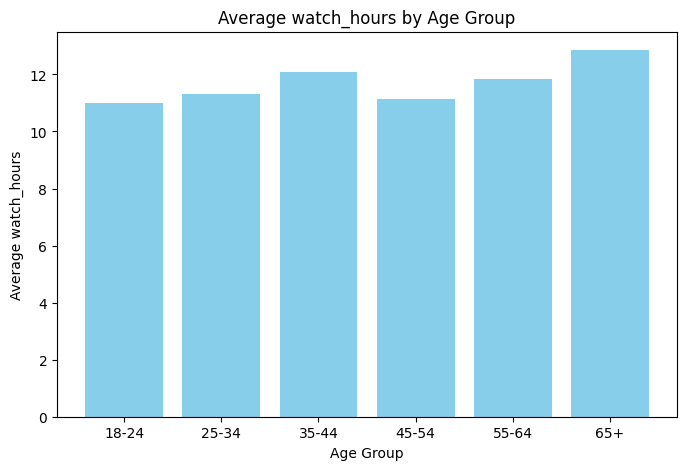

In [33]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('age_group')['watch_hours'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['watch_hours'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average watch_hours')
plt.title('Average watch_hours by Age Group')
plt.show()

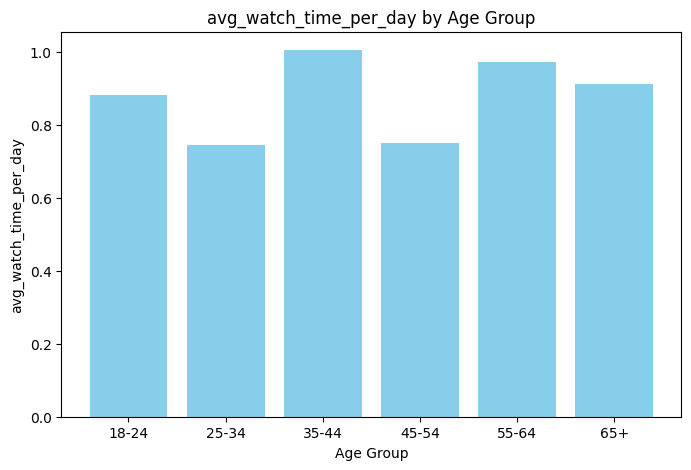

In [34]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('age_group')['avg_watch_time_per_day'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['avg_watch_time_per_day'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('avg_watch_time_per_day')
plt.title('avg_watch_time_per_day by Age Group')
plt.show()

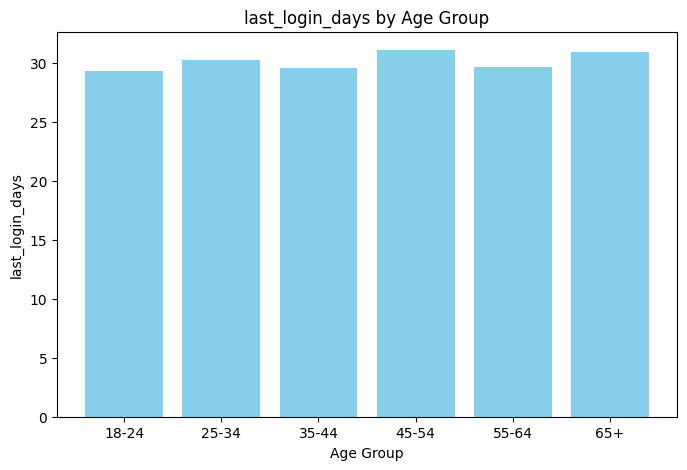

In [35]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('age_group')['last_login_days'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['last_login_days'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('last_login_days')
plt.title('last_login_days by Age Group')
plt.show()

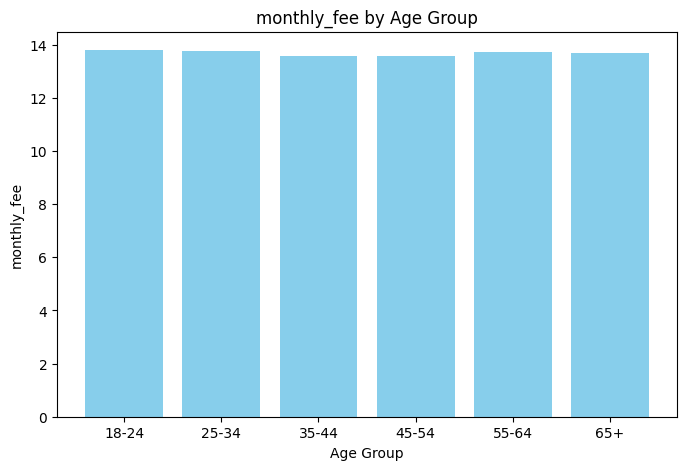

In [36]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('age_group')['monthly_fee'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['monthly_fee'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('monthly_fee')
plt.title('monthly_fee by Age Group')
plt.show()

In [37]:
# This boxplot visually demonstrates that the age distribution is very similar between customers who churned and those who did not, suggesting age is not a key factor in predicting churn in this sample.

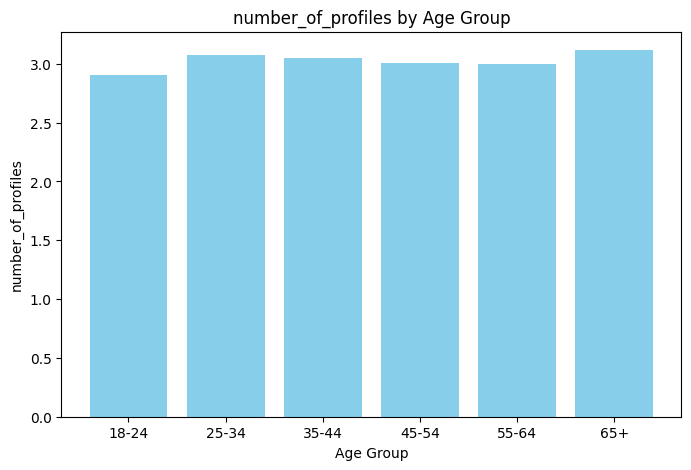

In [38]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('age_group')['number_of_profiles'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['number_of_profiles'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('number_of_profiles')
plt.title('number_of_profiles by Age Group')
plt.show()

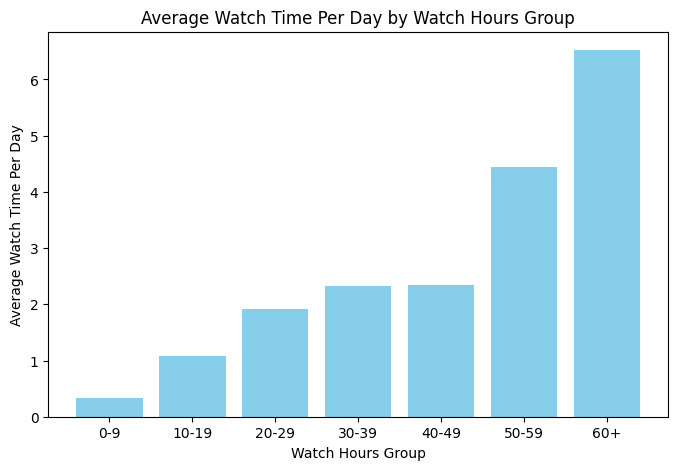

In [39]:
import pandas as pd

# Example: Adjust these bins based on your actual data's min and max
bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Add more bins or adjust as needed
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create the 'watch_hours_group' column based on 'watch_hours'
df['watch_hours_group'] = pd.cut(df['watch_hours'], bins=bins, labels=labels, right=False)

grouped = df.groupby('watch_hours_group')['avg_watch_time_per_day'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['watch_hours_group'], grouped['avg_watch_time_per_day'], color='skyblue')
plt.xlabel('Watch Hours Group')
plt.ylabel('Average Watch Time Per Day')
plt.title('Average Watch Time Per Day by Watch Hours Group')
plt.show()


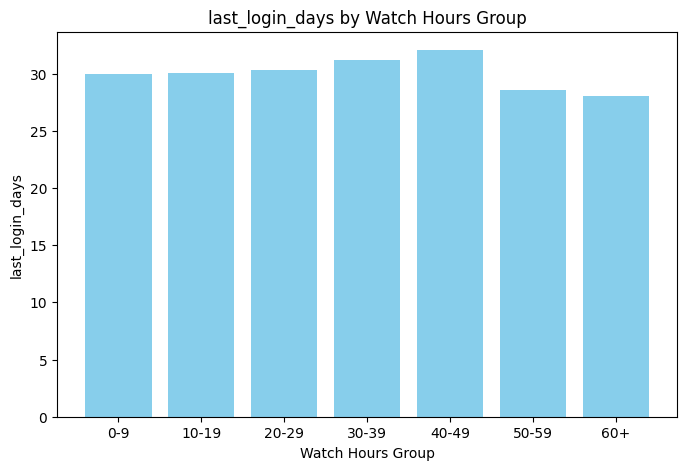

In [40]:
import pandas as pd

# Example: Adjust these bins based on your actual data's min and max
bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Add more bins or adjust as needed
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create the 'watch_hours_group' column based on 'watch_hours'
df['watch_hours_group'] = pd.cut(df['watch_hours'], bins=bins, labels=labels, right=False)

grouped = df.groupby('watch_hours_group')['last_login_days'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['watch_hours_group'], grouped['last_login_days'], color='skyblue')
plt.xlabel('Watch Hours Group')
plt.ylabel('last_login_days')
plt.title('last_login_days by Watch Hours Group')
plt.show()

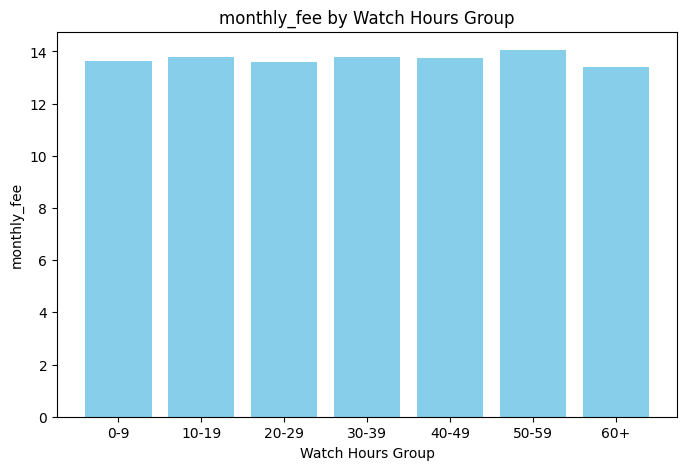

In [41]:
import pandas as pd

# Example: Adjust these bins based on your actual data's min and max
bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Add more bins or adjust as needed
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create the 'watch_hours_group' column based on 'watch_hours'
df['watch_hours_group'] = pd.cut(df['watch_hours'], bins=bins, labels=labels, right=False)

grouped = df.groupby('watch_hours_group')['monthly_fee'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['watch_hours_group'], grouped['monthly_fee'], color='skyblue')
plt.xlabel('Watch Hours Group')
plt.ylabel('monthly_fee')
plt.title('monthly_fee by Watch Hours Group')
plt.show()

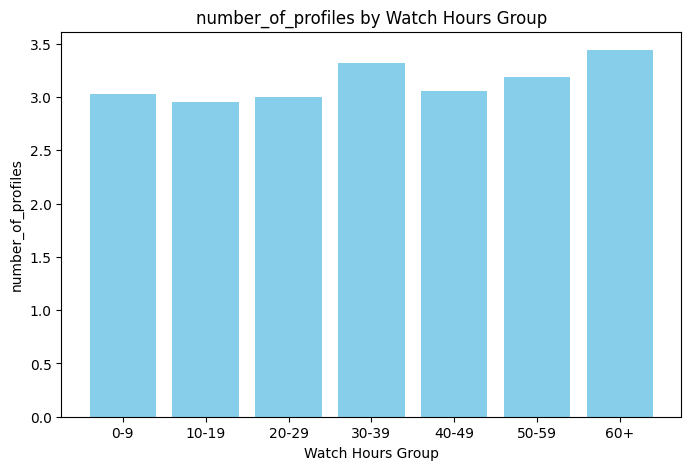

In [42]:
import pandas as pd

# Example: Adjust these bins based on your actual data's min and max
bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Add more bins or adjust as needed
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create the 'watch_hours_group' column based on 'watch_hours'
df['watch_hours_group'] = pd.cut(df['watch_hours'], bins=bins, labels=labels, right=False)

grouped = df.groupby('watch_hours_group')['number_of_profiles'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['watch_hours_group'], grouped['number_of_profiles'], color='skyblue')
plt.xlabel('Watch Hours Group')
plt.ylabel('number_of_profiles')
plt.title('number_of_profiles by Watch Hours Group')
plt.show()

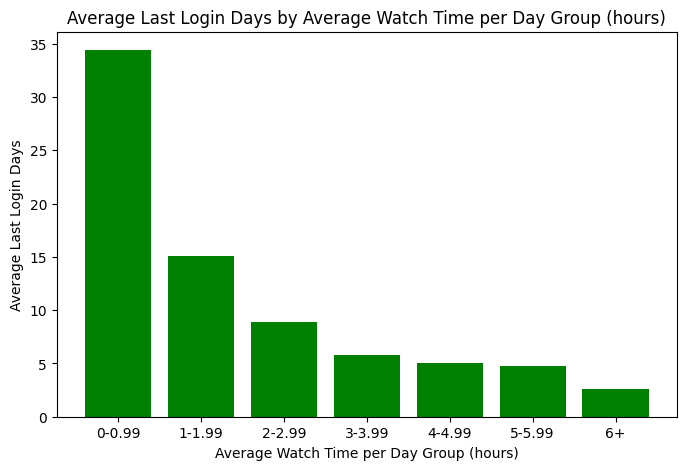

In [43]:
bins = [0, 1, 2, 3, 4, 5, 6, 10]
labels = ['0-0.99', '1-1.99', '2-2.99', '3-3.99', '4-4.99', '5-5.99', '6+']

# Create the group column for average watch time per day
df['avg_watch_time_per_day_group'] = pd.cut(df['avg_watch_time_per_day'], bins=bins, labels=labels, right=False)

# Group by the new column and calculate the mean of last_login_days
grouped = df.groupby('avg_watch_time_per_day_group')['last_login_days'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['avg_watch_time_per_day_group'], grouped['last_login_days'], color='green')
plt.xlabel('Average Watch Time per Day Group (hours)')
plt.ylabel('Average Last Login Days')
plt.title('Average Last Login Days by Average Watch Time per Day Group (hours)')
plt.show()


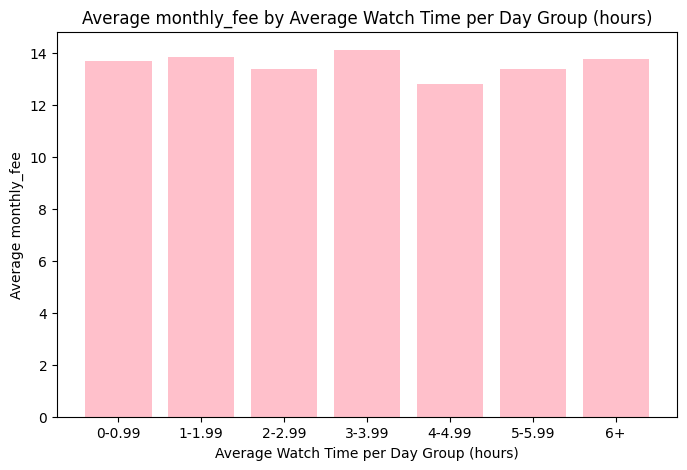

In [44]:
bins = [0, 1, 2, 3, 4, 5, 6, 10]
labels = ['0-0.99', '1-1.99', '2-2.99', '3-3.99', '4-4.99', '5-5.99', '6+']

# Create the group column for average watch time per day
df['avg_watch_time_per_day_group'] = pd.cut(df['avg_watch_time_per_day'], bins=bins, labels=labels, right=False)

# Group by the new column and calculate the mean of monthly_fee
grouped = df.groupby('avg_watch_time_per_day_group')['monthly_fee'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['avg_watch_time_per_day_group'], grouped['monthly_fee'], color='pink')
plt.xlabel('Average Watch Time per Day Group (hours)')
plt.ylabel('Average monthly_fee')
plt.title('Average monthly_fee by Average Watch Time per Day Group (hours)')
plt.show()


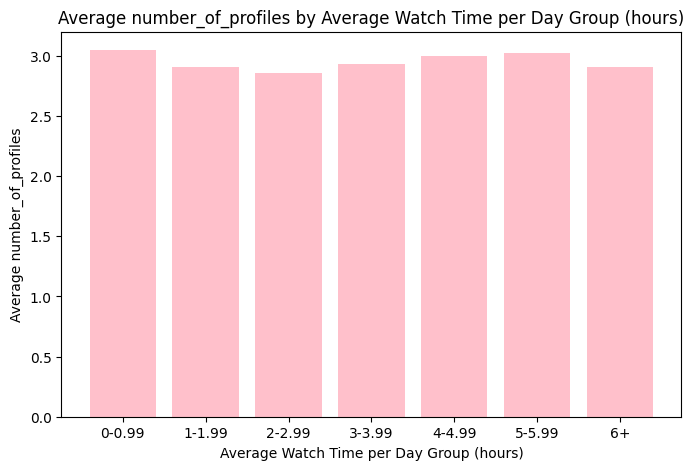

In [45]:
bins = [0, 1, 2, 3, 4, 5, 6, 10]
labels = ['0-0.99', '1-1.99', '2-2.99', '3-3.99', '4-4.99', '5-5.99', '6+']

# Create the group column for average watch time per day
df['avg_watch_time_per_day_group'] = pd.cut(df['avg_watch_time_per_day'], bins=bins, labels=labels, right=False)

# Group by the new column and calculate the mean of number_of_profiles
grouped = df.groupby('avg_watch_time_per_day_group')['number_of_profiles'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['avg_watch_time_per_day_group'], grouped['number_of_profiles'], color='pink')
plt.xlabel('Average Watch Time per Day Group (hours)')
plt.ylabel('Average number_of_profiles')
plt.title('Average number_of_profiles by Average Watch Time per Day Group (hours)')
plt.show()


In [46]:
import pandas as pd

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 90]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'age_group' based on 'age'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [47]:
grouped = df.groupby('age_group')['monthly_fee'].mean().reset_index()


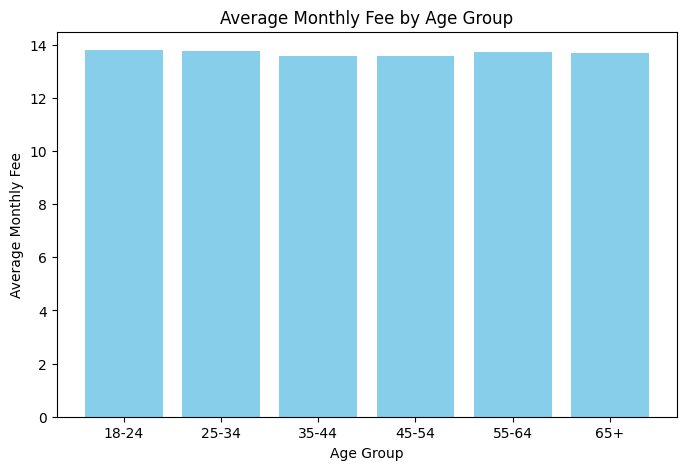

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['age_group'], grouped['monthly_fee'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Monthly Fee')
plt.title('Average Monthly Fee by Age Group')
plt.show()


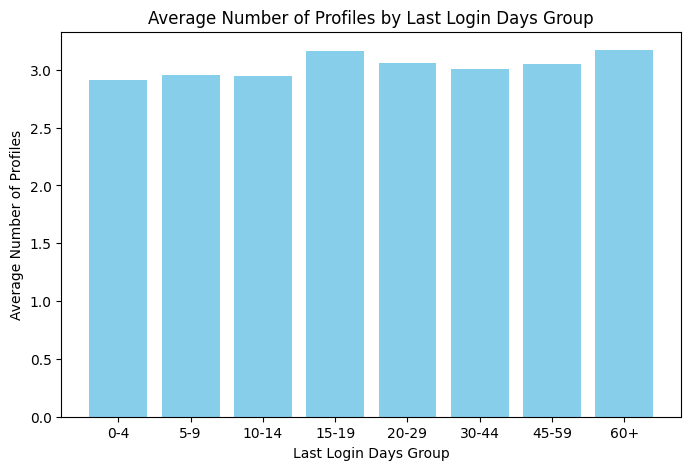

In [49]:
bins = [0, 5, 10, 15, 20, 30, 45, 60, 100]
labels = ['0-4', '5-9', '10-14', '15-19', '20-29', '30-44', '45-59', '60+']

df['last_login_days_group'] = pd.cut(df['last_login_days'], bins=bins, labels=labels, right=False)

grouped = df.groupby('last_login_days_group')['number_of_profiles'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['last_login_days_group'], grouped['number_of_profiles'], color='skyblue')
plt.xlabel('Last Login Days Group')
plt.ylabel('Average Number of Profiles')
plt.title('Average Number of Profiles by Last Login Days Group')
plt.show()


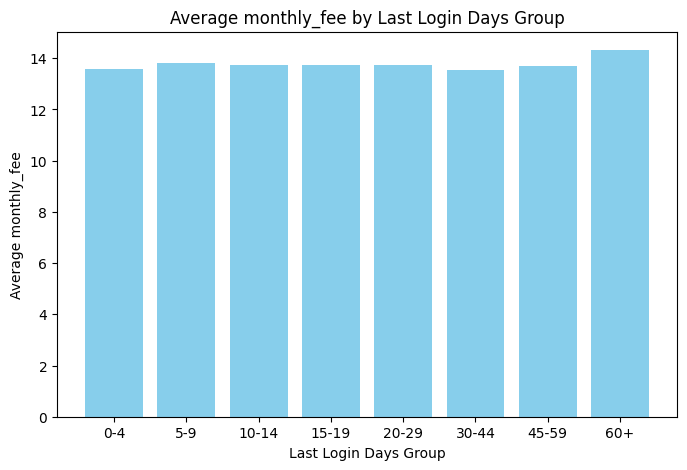

In [50]:
bins = [0, 5, 10, 15, 20, 30, 45, 60, 100]
labels = ['0-4', '5-9', '10-14', '15-19', '20-29', '30-44', '45-59', '60+']

df['last_login_days_group'] = pd.cut(df['last_login_days'], bins=bins, labels=labels, right=False)

grouped = df.groupby('last_login_days_group')['monthly_fee'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['last_login_days_group'], grouped['monthly_fee'], color='skyblue')
plt.xlabel('Last Login Days Group')
plt.ylabel('Average monthly_fee')
plt.title('Average monthly_fee by Last Login Days Group')
plt.show()


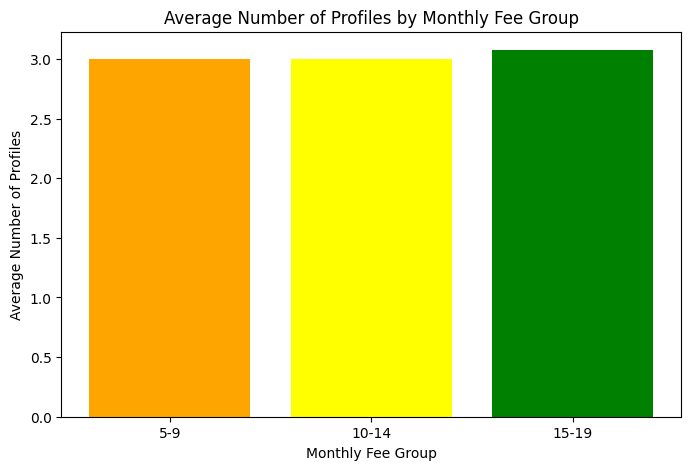

In [51]:
bins = [0, 5, 10, 15, 20, 25, 30, 50]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

df['monthly_fee_group'] = pd.cut(df['monthly_fee'], bins=bins, labels=labels, right=False)

grouped = df.groupby('monthly_fee_group')['number_of_profiles'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(grouped['monthly_fee_group'], grouped['number_of_profiles'], color= ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
)
plt.xlabel('Monthly Fee Group')
plt.ylabel('Average Number of Profiles')
plt.title('Average Number of Profiles by Monthly Fee Group')
plt.show()


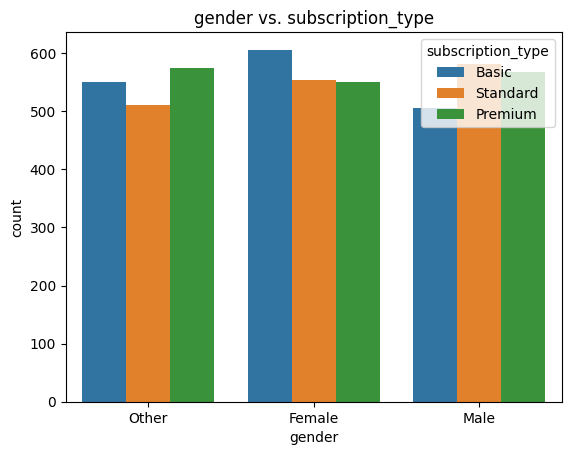

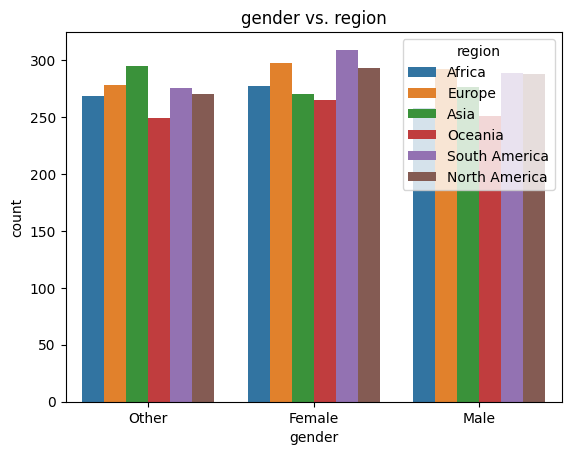

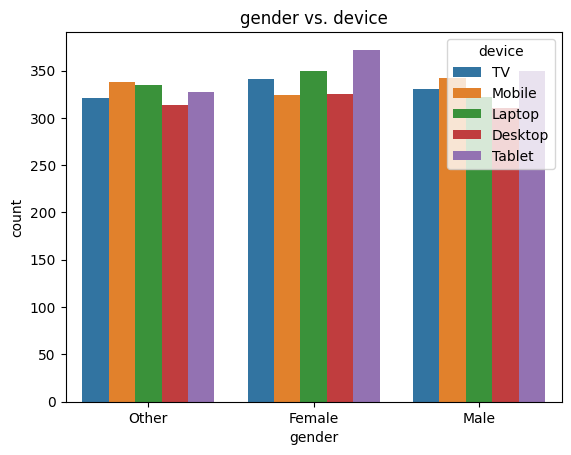

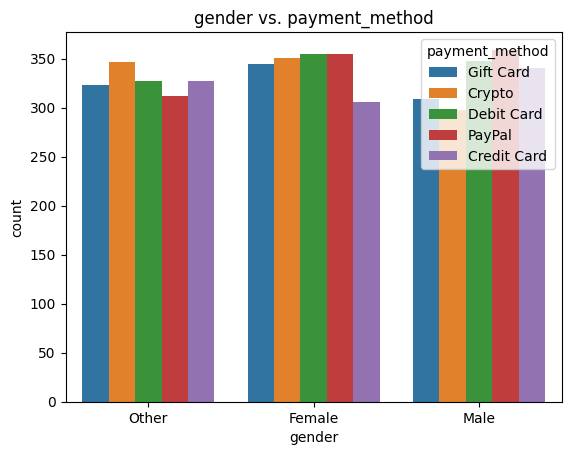

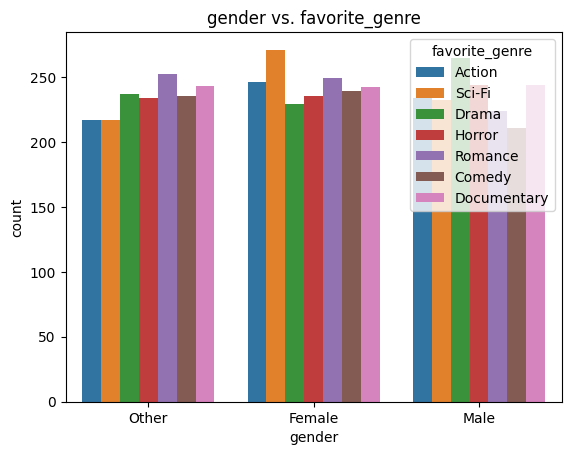

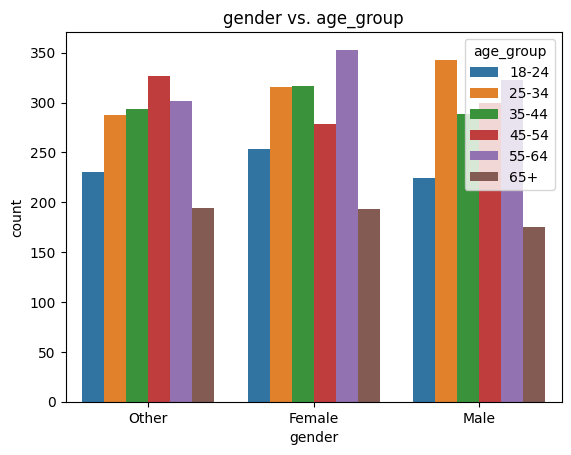

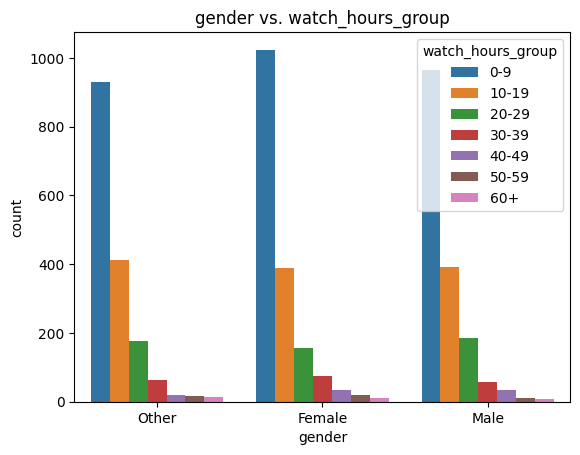

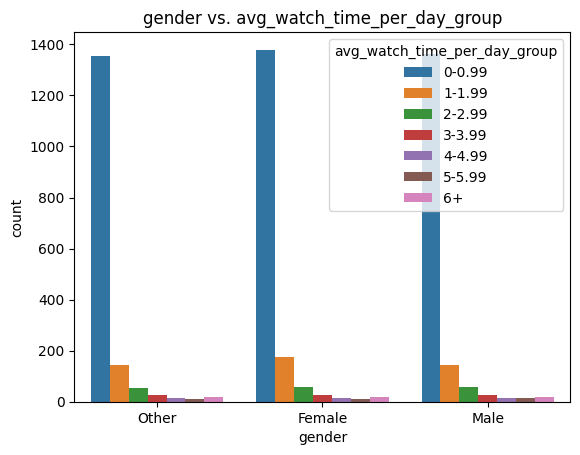

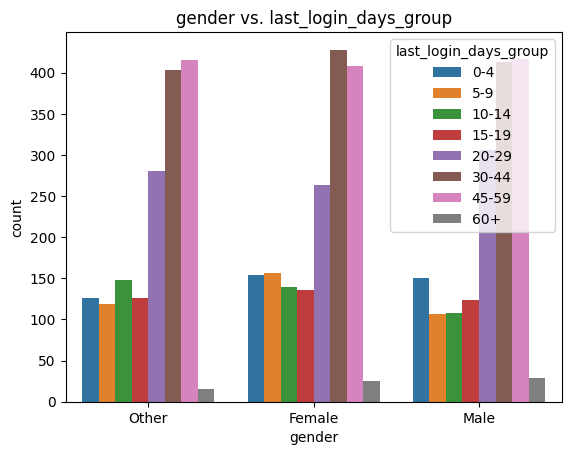

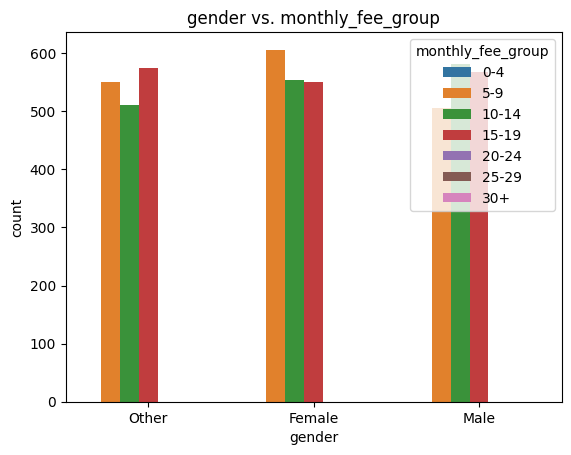

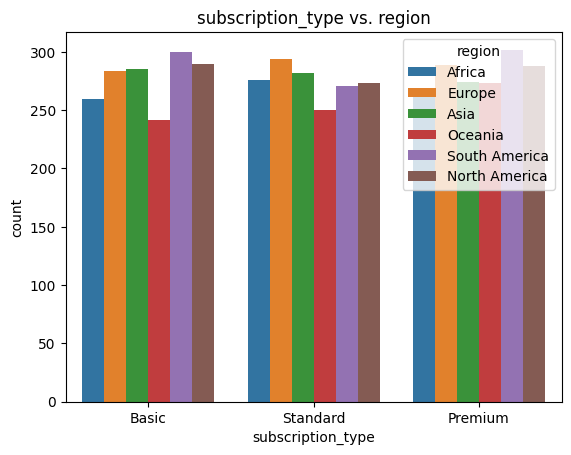

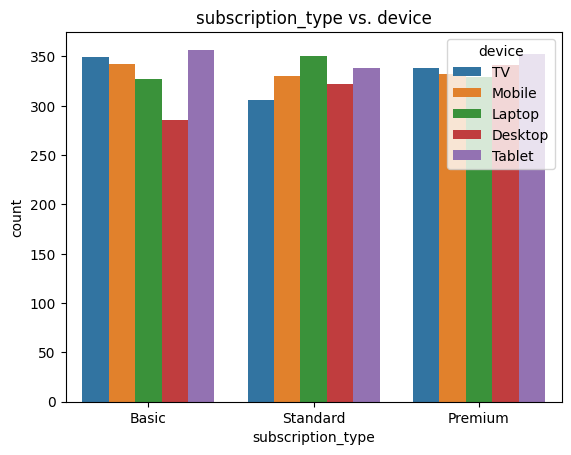

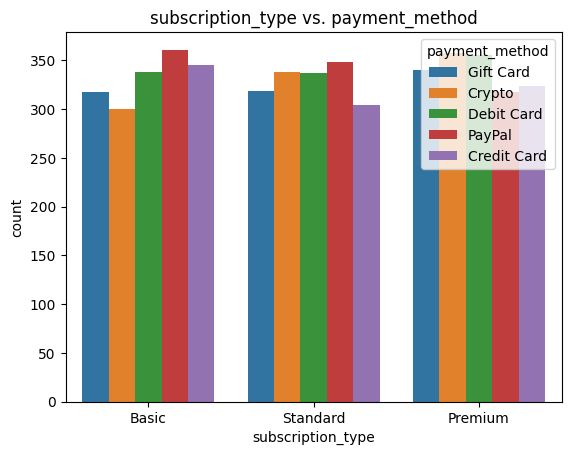

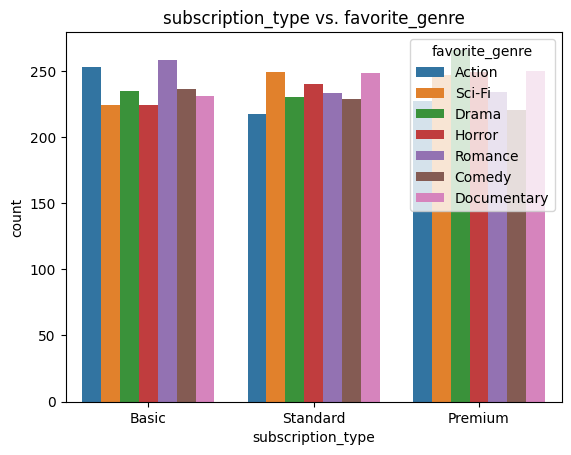

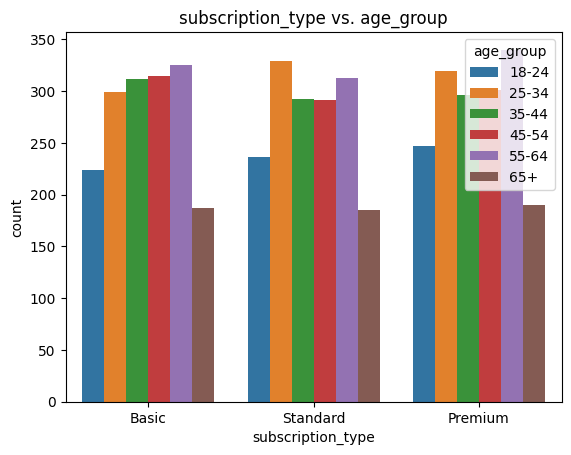

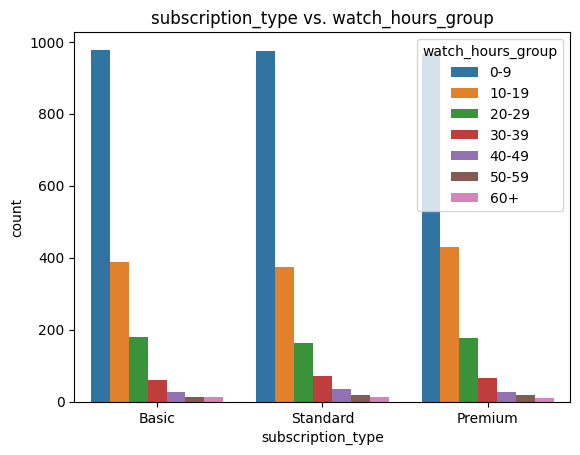

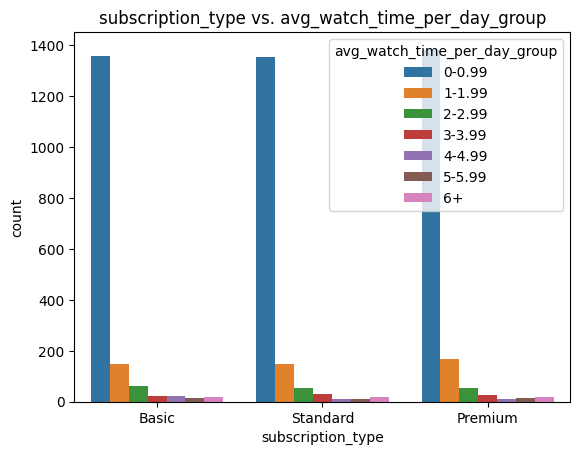

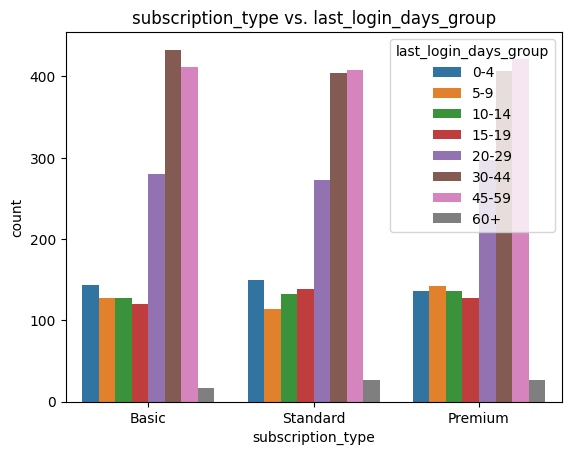

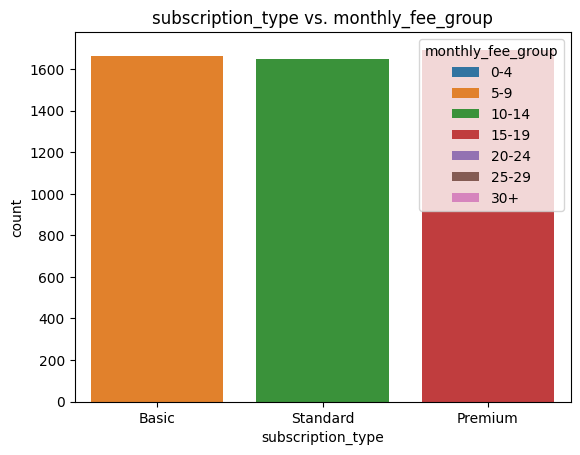

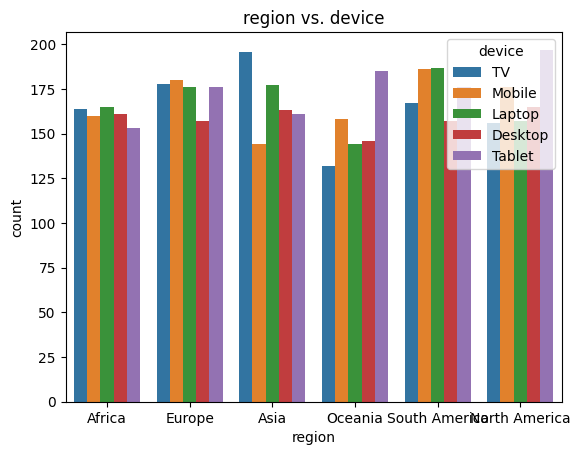

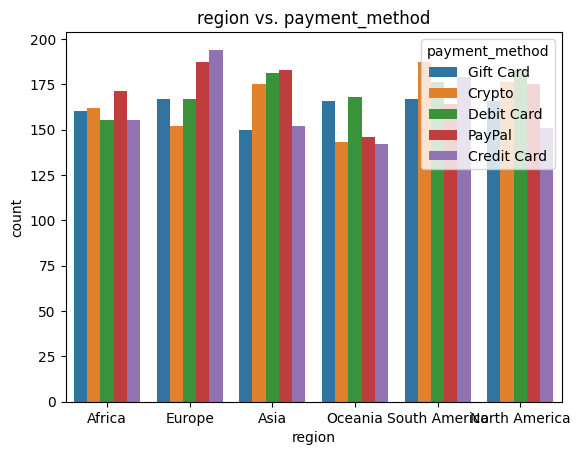

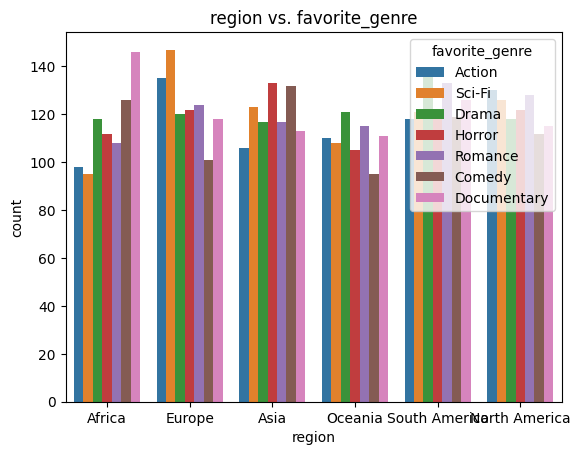

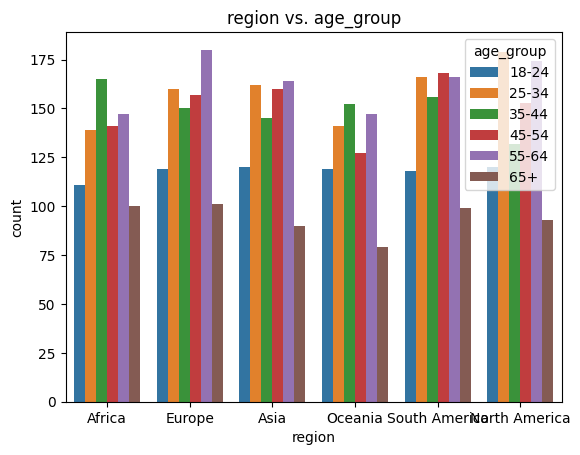

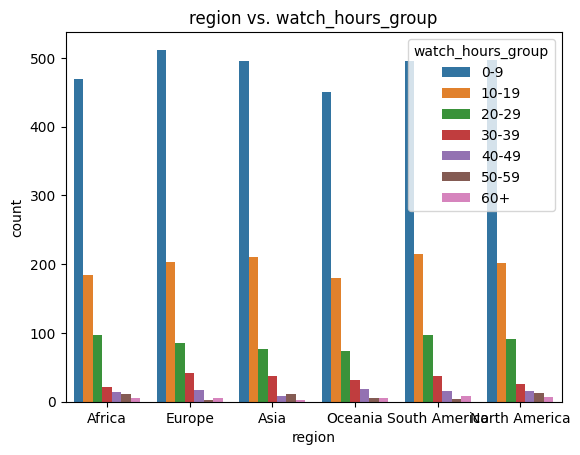

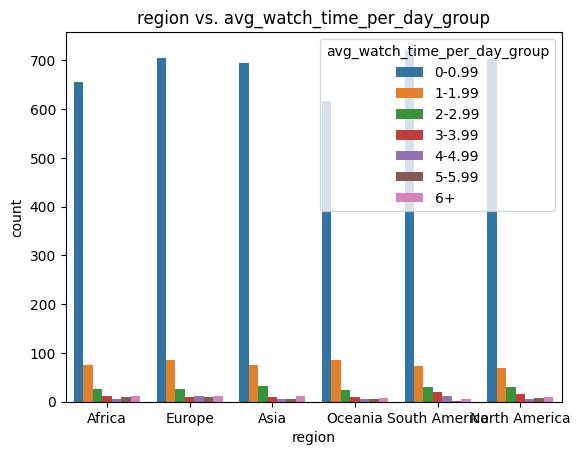

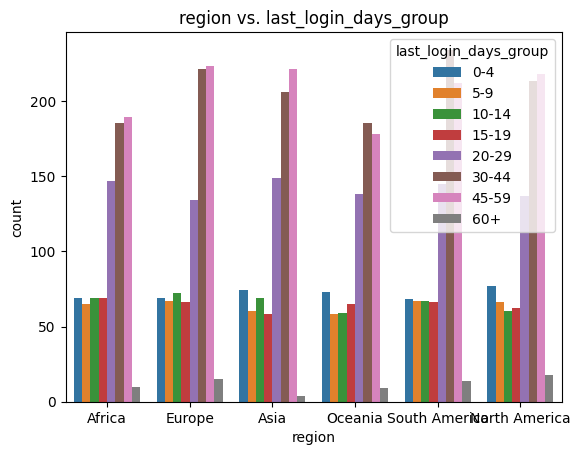

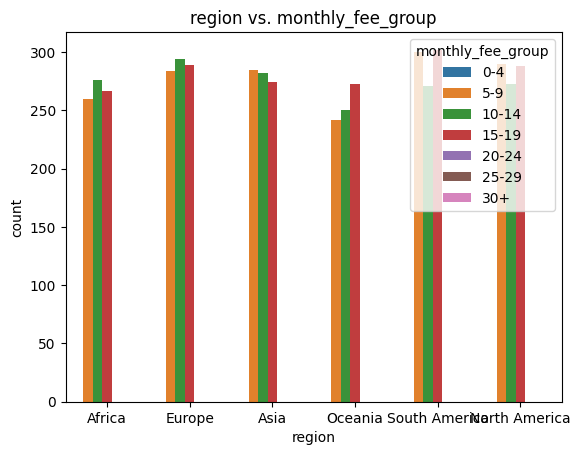

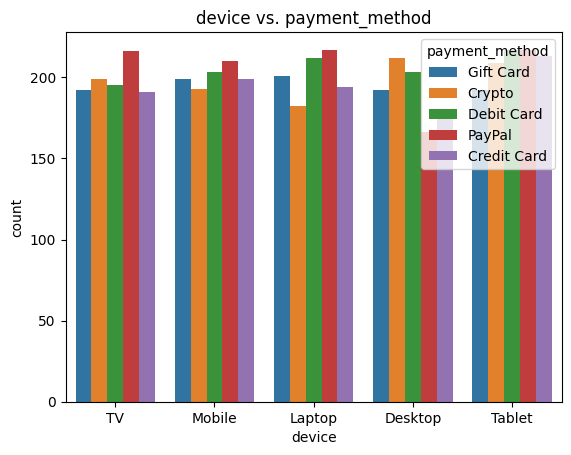

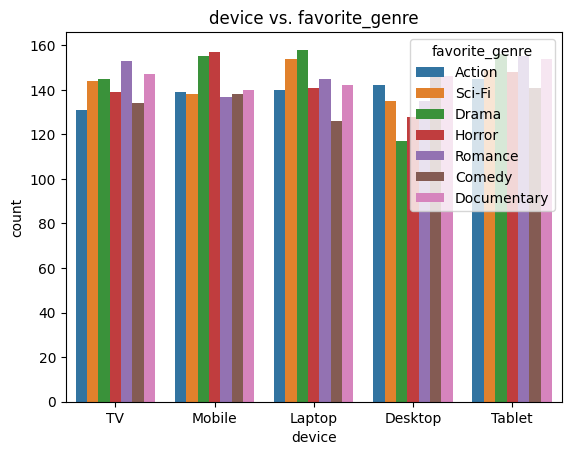

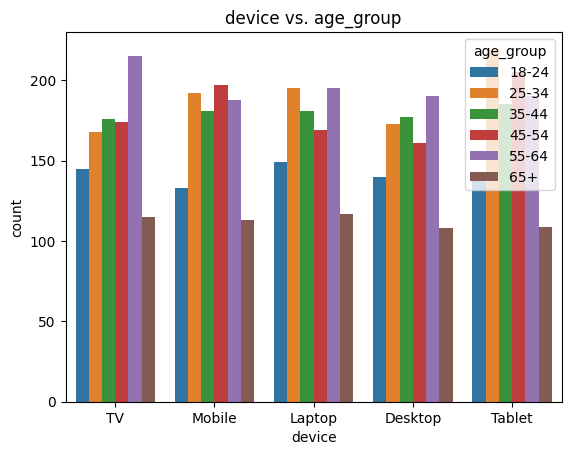

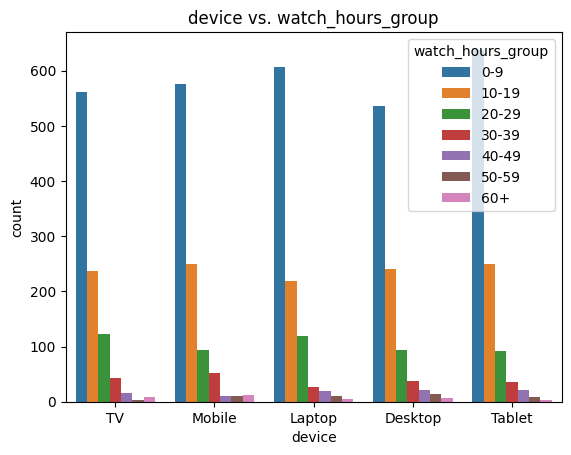

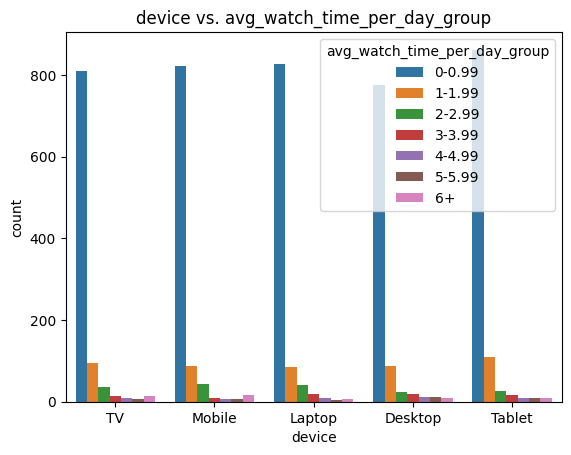

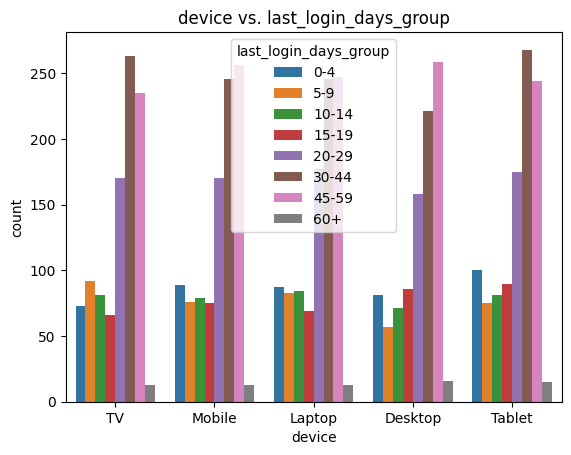

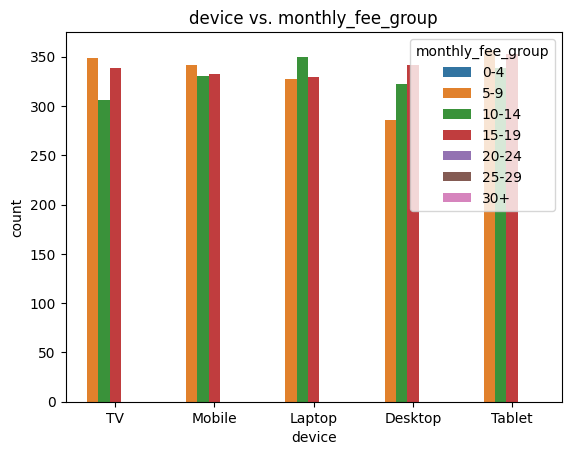

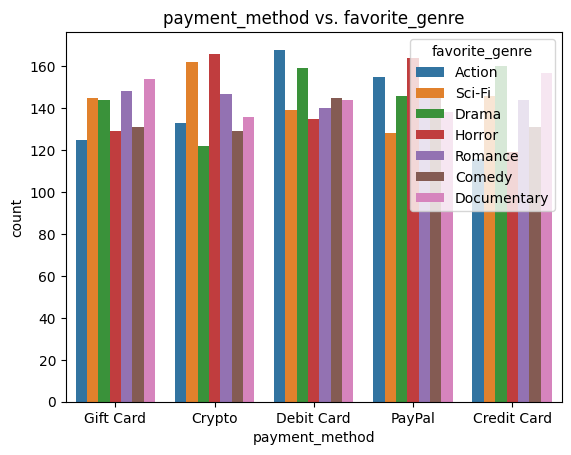

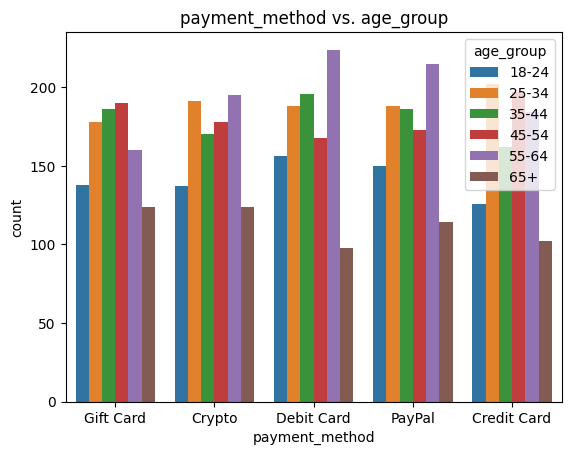

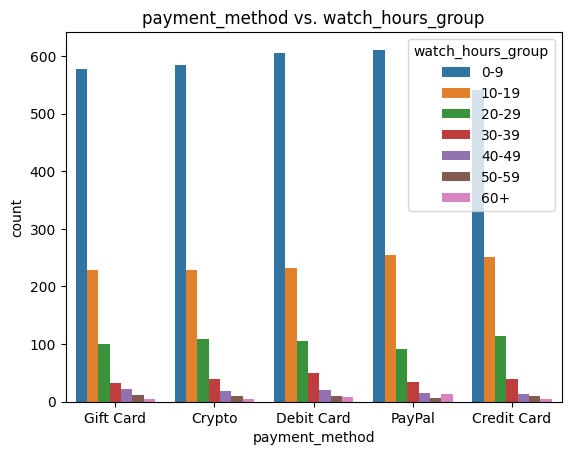

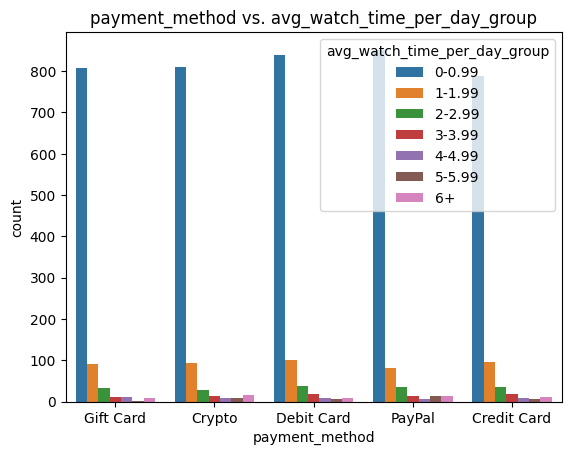

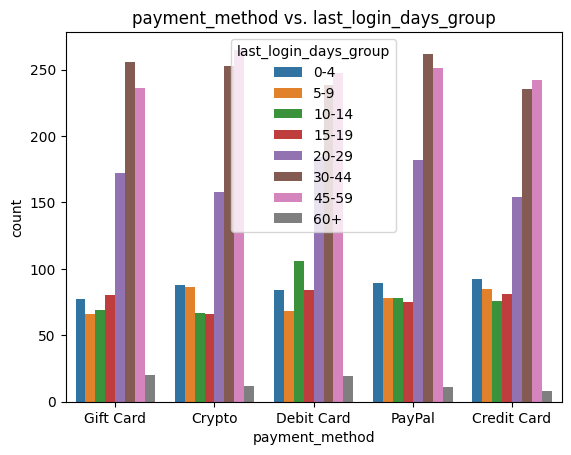

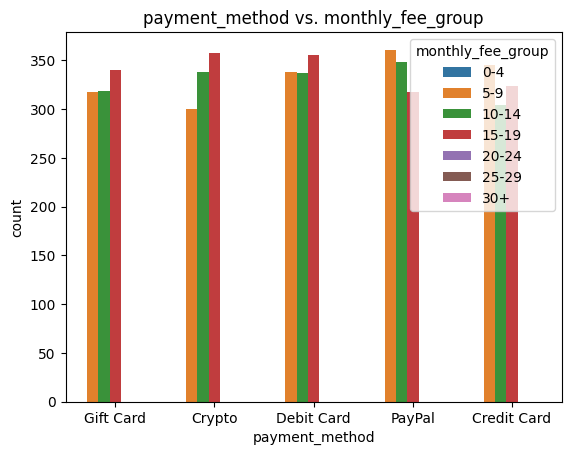

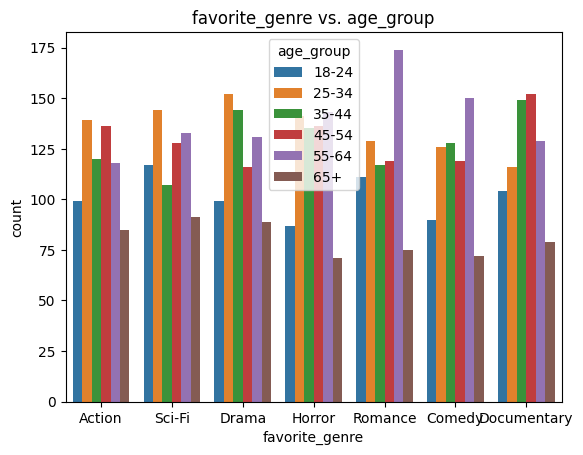

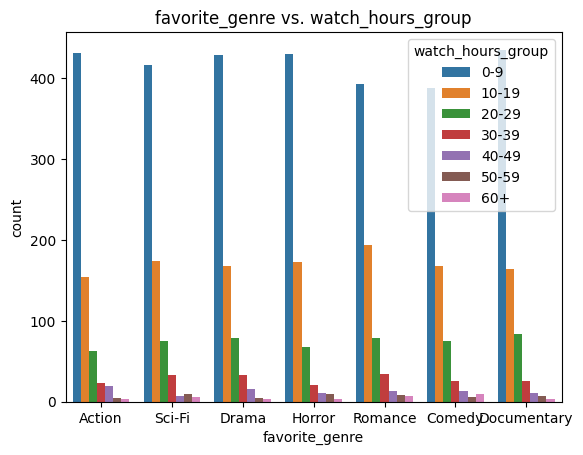

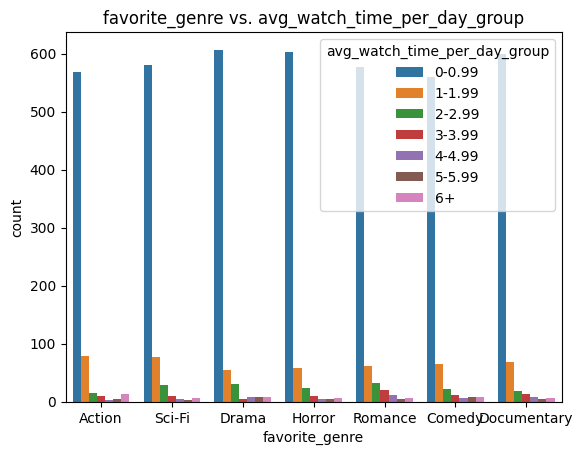

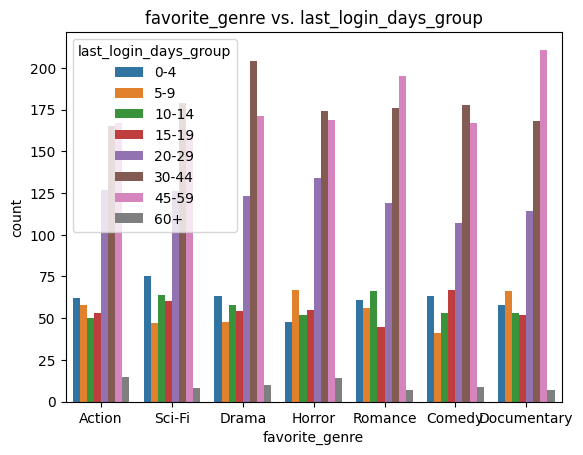

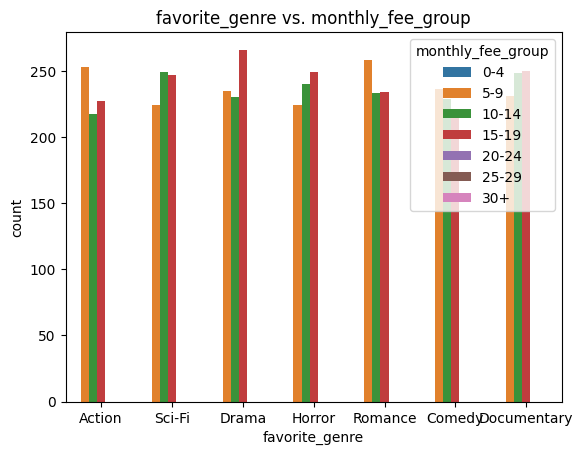

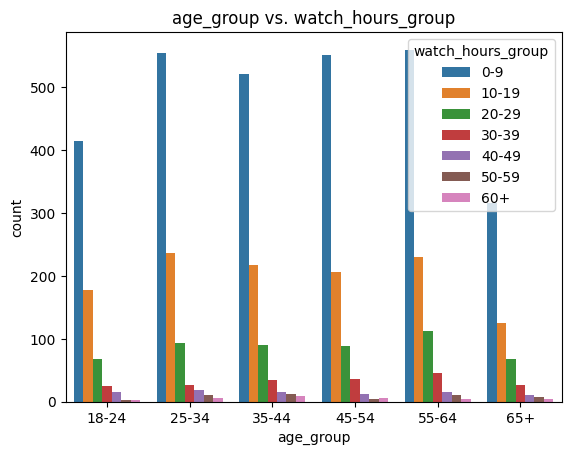

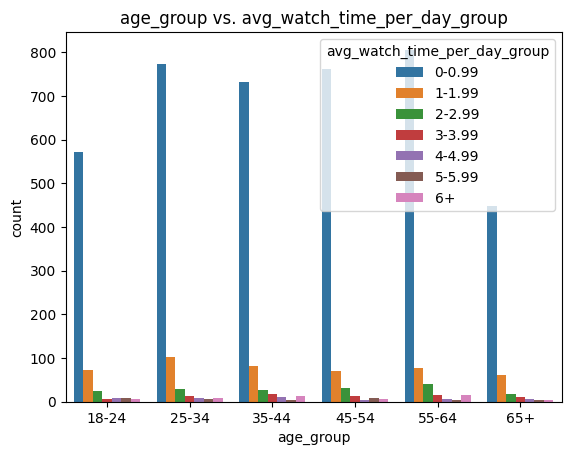

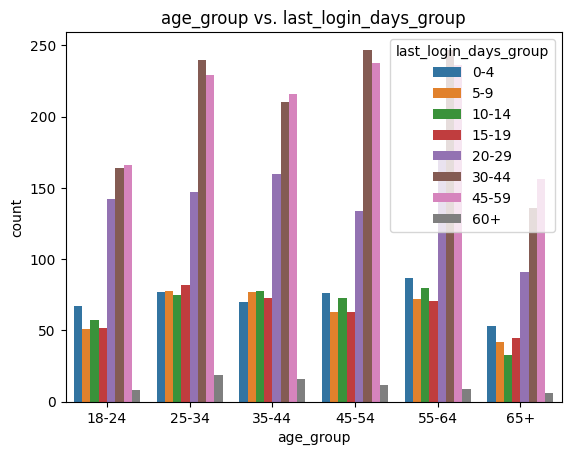

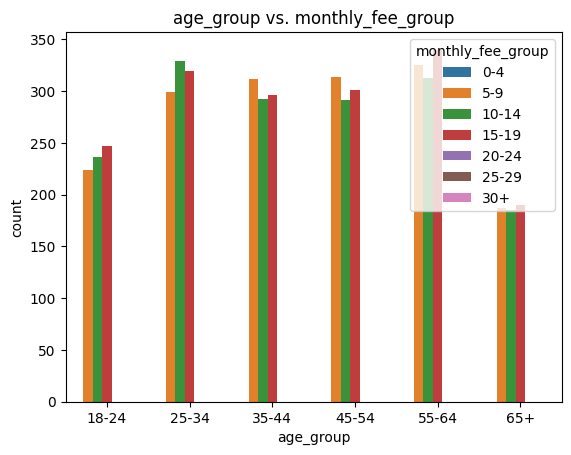

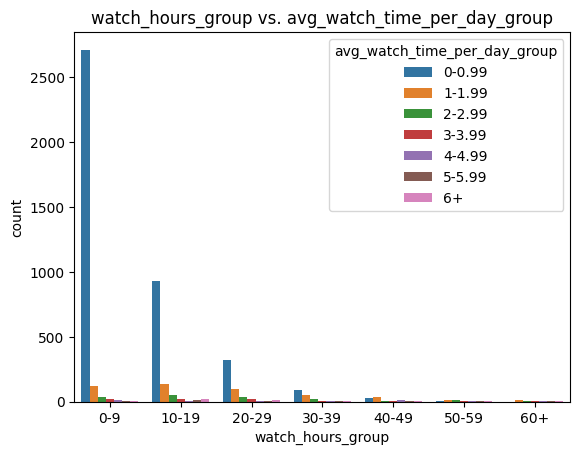

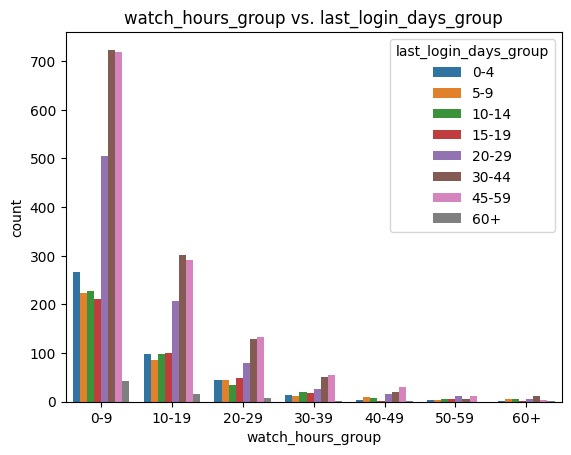

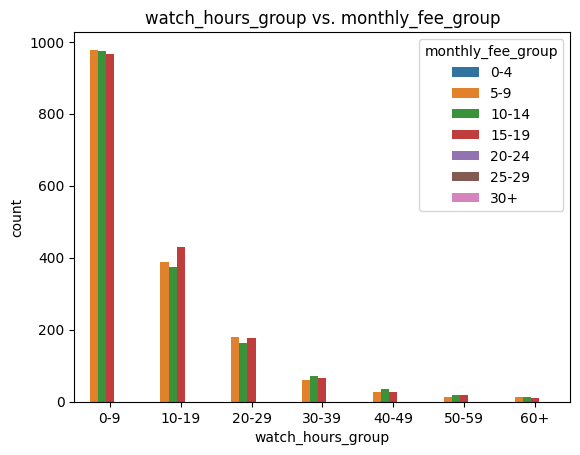

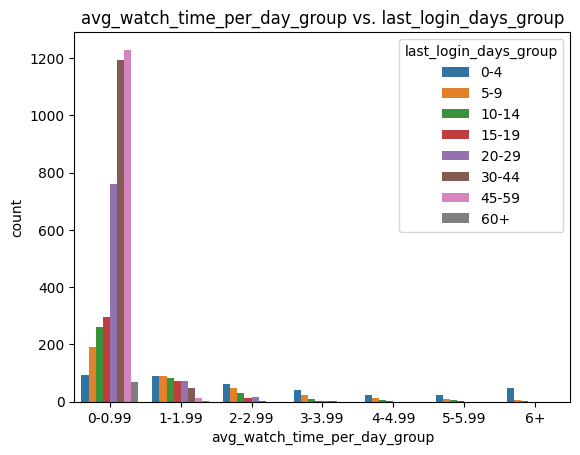

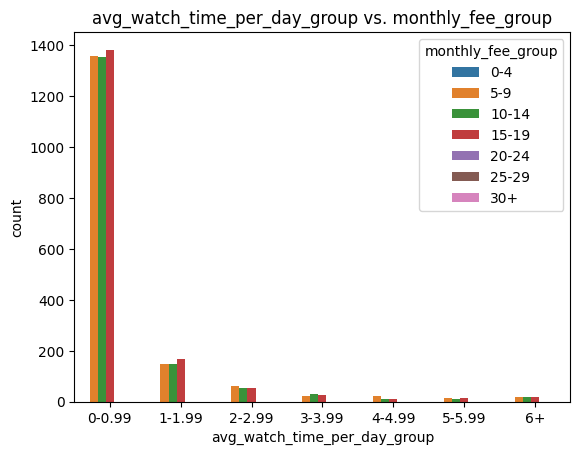

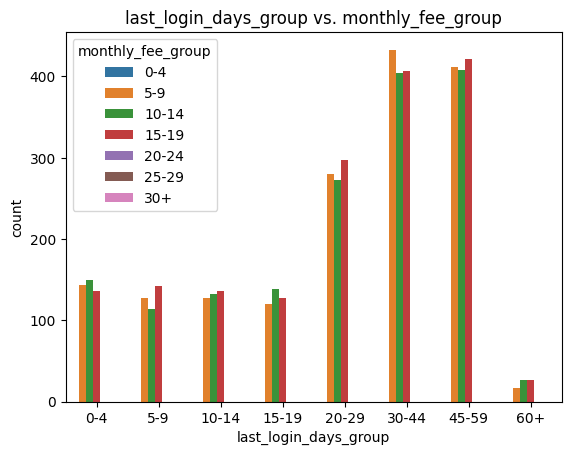

In [52]:
import itertools

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through all unique pairs
for col1, col2 in itertools.combinations(categorical_cols, 2):
    sns.countplot(x=col1, hue=col2, data=df)
    plt.title(f'{col1} vs. {col2}')
    plt.show()


Based on the analysis, in the categorical combination of variables, most of the 600 female users are using the Netflix service under the Basic subscription.
Around 580 Other users are using the service under the Premium subscription.
Similarly, 580 Male users are using the Netflix service under the Basic subscription.
Therefore, the number of Male and Other users using the service is the same, but the subscription types are different.


In the categorical combination of gender and device, most people categorized as 'Other' are using mobile devices to access Netflix, though some also use laptops. Between these two device types, the difference is slight for this group. Among females, tablets are the most commonly used device for accessing Netflix. Some female users also use other devices, but tablets are used most frequently by them. Male users also use tablets, but compared to females, the usage is lower. Female users show the highest preference for tablets among all gender groups.


Among the 'Other', 'Female', and 'Male' groups, 'Other' users mostly use cryptocurrency for making payments. Female users use almost all payment methods except credit cards, with slight differences in the number of users across methods. They commonly use gift cards, crypto, debit cards, and PayPal. Most male users prefer PayPal for making payments. Overall, while all gender groups use different payment methods, males tend to prefer PayPal, and females use a variety of methods except credit cards.

In the combination of gender and favorite genre, a high number of 'Other' users prefer watching romance movies, although they also watch other genres. Female users mostly prefer sci-fi, while male users primarily watch drama. Compared to all gender groups, sci-fi is most popular among female users.

MULTIVARIATE ANALYSIS:

📊 Pairplot: Numeric Variable Relationships


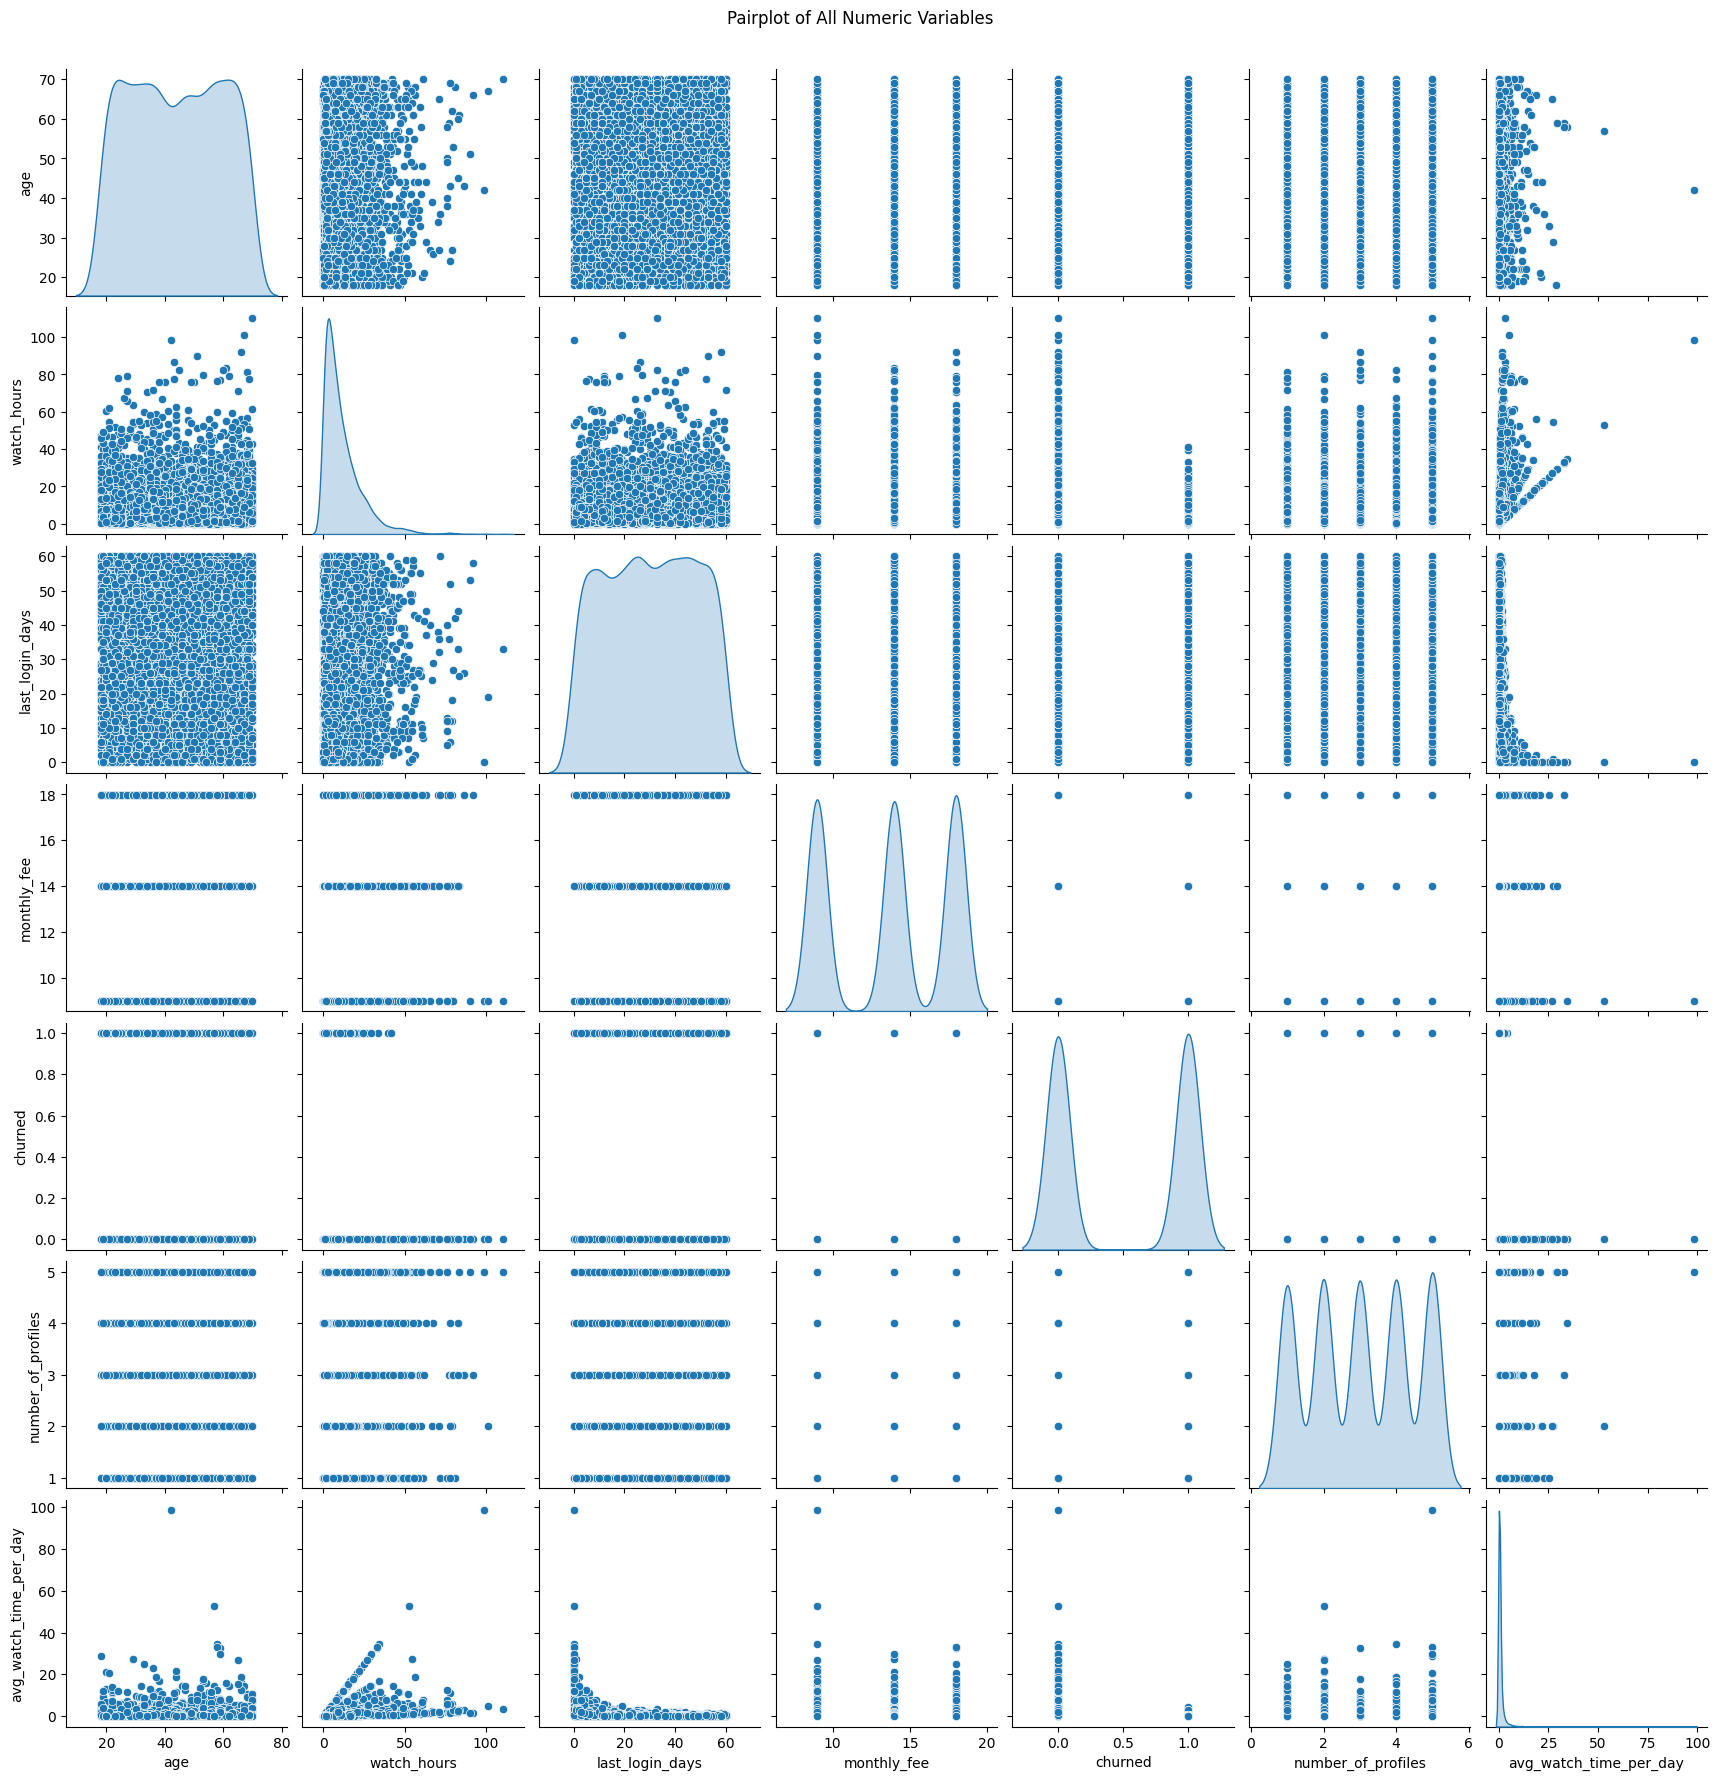

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1️⃣ Pairplot for all numeric variables
print("📊 Pairplot: Numeric Variable Relationships")
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()




📈 Correlation Heatmap


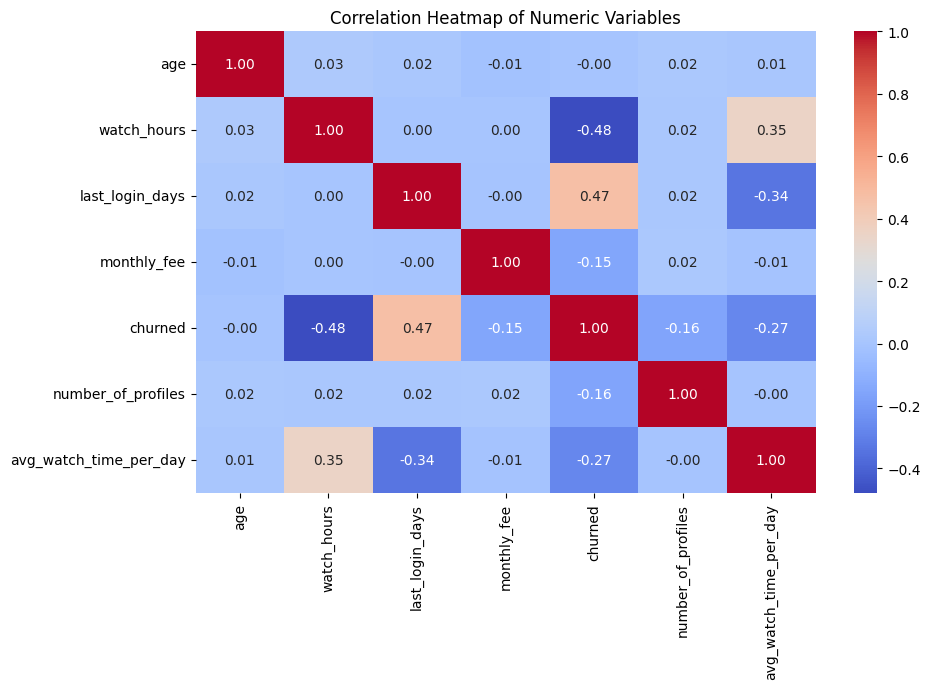

In [54]:

# 2️⃣ Heatmap for correlation between numeric variables
print("📈 Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [55]:
wwww

NameError: name 'wwww' is not defined

In [ ]:
print(df[continuous_cols])

In [ ]:
## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'age' column
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'watch_hours' column
sns.boxplot(x=df['watch_hours'])
plt.title('Boxplot of watch_hours')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'last_login_days' column
sns.boxplot(x=df['last_login_days'])
plt.title('Boxplot oflast_login_days')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'monthly_fee' column
sns.boxplot(x=df['monthly_fee'])
plt.title('Boxplot of monthly_fee')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'number_of_profiles' column
sns.boxplot(x=df['number_of_profiles'])
plt.title('Boxplot of number_of_profiles')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for the 'avg_watch_time_per_day' column
sns.boxplot(x=df['avg_watch_time_per_day'])
plt.title('Boxplot of avg_watch_time_per_day')
plt.show()

In [ ]:
## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

In [ ]:
# Only plot boxplots for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Make boxplots
numeric_cols.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [ ]:
## in continous variable ,some column has outlier those are watch hours and avg_watch_time_per_day

In [ ]:
##   CHECKING THE OUTLIER FOR  categorical  COLUMN

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='region', data=df)
plt.title('Category Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Create bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Conclusion based on categorical bar plots:
# After visualizing the distribution of categories within each categorical column using bar plots, it is observed that the heights of the bars for each category are relatively consistent or show a clear distribution without any isolated or extremely small bars compared to others. This indicates that there are no categories that appear significantly less frequently than others in a way that would suggest an outlier.
# Therefore, based on the bar plots, there are no apparent outliers in the categorical columns.

In [ ]:
## While checking for outliers in the categorical column, it appears there are no outliers, as the bar plot shows the heights are evenly or highly distributed..

In [ ]:
## below checking the distribution of the numerical variables for each continuos column

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
## below checking the distribution for  the categorical column

In [ ]:
# Separate columns by data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
for col in categorical_cols:
    print(col)

print("\nContinuous (numeric) columns:")
for col in numeric_cols:
    print(col)

In [ ]:
df['gender'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.title('Distribution of Categories')
plt.show()

In [ ]:
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set number of columns for the subplot grid
n_cols = 3  # set how many plots you want per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols #calculate how many rows you want based on catergorical column

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# In the above count plots, each category appears with similar frequency across different columns in the dataset.

In [ ]:
# removing outliers for 'watch_hours', 'avg_watch_time_per_day column,the reason for removing outliers before encoding it affects accuracy of the model.

In [ ]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    # Exclude the target column
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Usage example:
# df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')


In [ ]:
# Make sure this function and line are run before your plotting code
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()


In [ ]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'watch_hours'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

In [ ]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    # Exclude the target column
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.50 * IQR
        upper_bound = Q3 + 0.50 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Usage example:
# df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()


In [ ]:
#I first used the 1.5×IQR method to remove outliers.
#After that, I noticed that some values still appeared to be outliers (for example, in boxplots).
#So, I applied a stricter 0.5×IQR rule to remove more edge-case values.
#However, since I applied it to the already-cleaned data, the IQR and bounds had changed, and no additional rows were removed

In [ ]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5* IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [ ]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.50 * IQR
        upper_bound = Q3 + 0.50 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [ ]:
#I first used the 1.5×IQR method to remove outliers.
#After that, I noticed that some values still appeared to be outliers (for example, in boxplots).
#So, I applied a stricter 0.5×IQR rule to remove more edge-case values.
#However, since I applied it to the already-cleaned data, the IQR and bounds had changed, and no additional rows were removed

In [ ]:
df.shape

In [ ]:
wait

In [ ]:
def remove_outliers_iqr_exclude_target(df, target_column):
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.50 * IQR
        upper_bound = Q3 + 0.50 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['watch_hours'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['watch_hours'].plot.box(title='After Cleaning')
plt.show()

In [ ]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'watch_hours'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

In [ ]:
def count_outliers_iqr(df, target_column=None):
    numeric_cols = df.select_dtypes(include='number').columns
    if target_column:
        numeric_cols = [col for col in numeric_cols if col != target_column]
    outlier_counts = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Usage:
# outliers_remaining = count_outliers_iqr(df, target_column='churn')
# print(outliers_remaining)


In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [ ]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'avg_watch_time_per_day'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

In [ ]:
def count_outliers_iqr(df, target_column=None):
    numeric_cols = df.select_dtypes(include='number').columns
    if target_column:
        numeric_cols = [col for col in numeric_cols if col != target_column]
    outlier_counts = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.50 * IQR
        upper_bound = Q3 + 0.50 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Usage:
# outliers_remaining = count_outliers_iqr(df, target_column='churn')
# print(outliers_remaining)

In [ ]:
# Remove outliers first
df_no_outliers = remove_outliers_iqr_exclude_target(df, target_column='churn')

# Then plot before and after
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['avg_watch_time_per_day'].plot.box(title='Before Cleaning')
plt.subplot(1,2,2)
df_no_outliers['avg_watch_time_per_day'].plot.box(title='After Cleaning')
plt.show()

In [ ]:
def count_outliers_column(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Usage example:
column_name = 'avg_watch_time_per_day'  # Change this to your desired column
outlier_count = count_outliers_column(df, column=column_name)
print(f"Number of outliers in '{column_name}': {outlier_count}")

In [ ]:
  df.shape

In [ ]:
wwwwww